# *HACKATHON DESCRIPTION*
---

A Nigerian automobile company, Great Motors, has just employed you as their lead data scientist for the analytics division.

Great Motors deals in used cars, with a huge market base in Nigeria. The company has a unique platform where customers can buy and sell cars. A seller posts details about the vehicle for review by the company’s mechanic on the platform to ascertain the vehicle's value. The company then lists the car for sale at the best price. Great Motors makes its profit by receiving a percentage of the selling price listed on the company platform. To ensure the car's selling price is the best for both the customer selling the vehicle and Great Motors, you have been assigned the task of coming up with a predictive model for determining the price of the car.

Your job is to predict the price the company should sell a car based on the available data the mechanics have submitted to you.

***Importing libraries needed***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # set plots to seaborn style

## The Data

There are ~7000 entries in Train and ~2000 entries in Test.

The objective of the challenge is to predict the price (Amount (Million Naira) the company should sell a car based on the available data (Location, Maker, Model, Year, Colour, Amount (Million Naira), Type, Distance). The objective is the predict the selling price.



In [2]:
!ls ../datasets

SampleSubmission.csv  Test.csv	Train.csv  VariableDefinitions.csv


In [3]:
train = pd.read_csv('../datasets/Train.csv')
test = pd.read_csv('../datasets/Test.csv')

train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [4]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


**The dataframe below gives a description of the features in the dataset**

In [5]:
pd.set_option('display.max_colwidth', None)    # displays full information

variables = pd.read_csv('../datasets/VariableDefinitions.csv')
variables

,VehicleID,This is the unique identifier of the car.
0,Location,This is the location in Nigeria where the seller is based.
1,Maker,This is the manufacturer of the car. It is the brand name.
2,Model,This is the the name of the car product within a range of similar car products.
3,Year,This is the year the car was manufactured.
4,Colour,This is the colour of the car.
5,Amount (Million Naira),This is the selling price of the car. It is the amount the company will sell the car.
6,Type,"This is the nature of previous use of the car, whether it was previously used within Nigeria or outside Nigeria."
7,Distance,This is the mileage of the car. It is how much distance it covered in its previous use


In [6]:
dfs = [train, test]
for df in dfs:
    print(f'Shape of data is {df.shape}')

Shape of data is (7205, 9)
Shape of data is (2061, 8)


In [7]:
for df in dfs:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-n

The train and test set contains some null value in their features... 
Taking a closer look at them

In [8]:
test.isna().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           2
Colour         0
Type          54
Distance     676
dtype: int64

In [9]:
train.isna().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

**Dropping null values**

Null values are contained mostly in the distance column and replacing them with the mean can add bias to our model

In [10]:
for df in dfs:
    df.dropna(inplace=True, axis=0)

In [11]:
for df in dfs:
    print(df.isna().sum())

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64
VehicleID    0
Location     0
Maker        0
Model        0
Year         0
Colour       0
Type         0
Distance     0
dtype: int64


**Converting year to datetime year value**

In [12]:
for df in dfs:
    df.Year = df.Year.apply(lambda x: x.replace(',',''))
    df.Year = pd.to_datetime(df.Year).dt.year

**Converting distance feature in train dataframe to integers**

In [14]:
train.Distance = train.Distance.apply(lambda x: x.replace(',',''))
train.Distance = train.Distance.astype('float')

In [19]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.50,Nigerian Used,125000.0
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.20,Foreign Used,110852.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.80,Foreign Used,30000.0
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.60,Nigerian Used,125206.0
8,VHL15637,Lagos,Toyota,Sienna,2012,Blue,7.76,Foreign Used,350882.0


## ***EXPLORATION***

Now the cleaning has been taken care of we'll be taking a deeper dive into the data, column by column on how they relate to the target variables and see if we can come up with any insights that can be useful in the modelling.

But first a Summary.

In [16]:
train.describe()

,Year,Amount (Million Naira),Distance
count,4627.000000,4627.000000,4.627000e+03
mean,2010.912470,10.970374,1.021939e+05
std,4.859005,20.129946,1.186818e+05
min,1986.000000,0.450000,1.000000e+00
25%,2008.000000,3.400000,5.235200e+04
50%,2011.000000,5.600000,8.000000e+04
75%,2014.000000,11.500000,1.132715e+05
max,2022.000000,430.000000,1.985400e+06


In [17]:
train.describe(include=['O'])

,VehicleID,Location,Maker,Model,Colour,Type
count,4627,4627,4627,4627,4627,4627
unique,3687,3,49,952,18,3
top,VHL12352,Lagos,Toyota,Camry,Black,Foreign Used
freq,5,2121,1869,441,1356,3181


<AxesSubplot:ylabel='Frequency'>

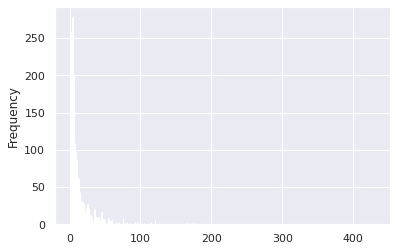

In [22]:
train['Amount (Million Naira)'].plot.hist(bins=1000)

Its clear that the cost of most of the cars are less than 100 million

In [26]:
df.VehicleID.value_counts(ascending=False)

VHL11310    4
VHL12909    3
VHL12562    3
VHL17034    3
VHL10360    3
           ..
VHL15425    1
VHL13922    1
VHL15623    1
VHL19331    1
VHL13881    1
Name: VehicleID, Length: 1241, dtype: int64

VehocleID contains unique values so can be dropped

In [28]:
for df in dfs:
    df.drop(columns=['VehicleID'], inplace=True)
    

In [32]:
df.Location.value_counts()

Lagos     605
Abuja     598
Ibadan    127
Name: Location, dtype: int64